In [1]:
# ================================
# 📥 Load YouTube Ad Revenue Dataset
# ================================

import pandas as pd

# ✅ Use relative path (best practice)
file_path = "../data/youtube_ad_revenue_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Confirm successful load
print("✅ Dataset loaded successfully!")
print(f"📊 Shape of dataset: {df.shape}")

# Display first 5 rows
df.head()


✅ Dataset loaded successfully!
📊 Shape of dataset: (122400, 12)


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [2]:
# ================================
# 🧭 Step 3: Basic Dataset Information
# ================================

# Check column data types and non-null counts
print("📌 Dataset Info:")
df.info()

# Check missing values in percentage
print("\n📊 Missing Values (%):")
missing_percent = (df.isnull().mean() * 100).round(2)
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n📝 Number of duplicate rows: {duplicate_count}")


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB

📊 Missing Values (%):
likes                 5.00
comments              4.99
watch

In [3]:
# ================================
# 📈 Step 4: Descriptive Statistics
# ================================

# 🔸 Summary stats for numeric columns
print("📊 Descriptive Statistics (Numeric):")
display(df.describe())

# 🔸 Summary stats for categorical columns (object types)
print("\n📝 Descriptive Statistics (Categorical):")
display(df.describe(include='object'))


📊 Descriptive Statistics (Numeric):


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254



📝 Descriptive Statistics (Categorical):


,video_id,date,category,device,country
count,122400,122400,122400,122400,122400
unique,5000,365,6,4,6
top,vid_3033,2025-04-03 10:50:40.993199,Education,TV,CA
freq,47,382,20514,30646,20603


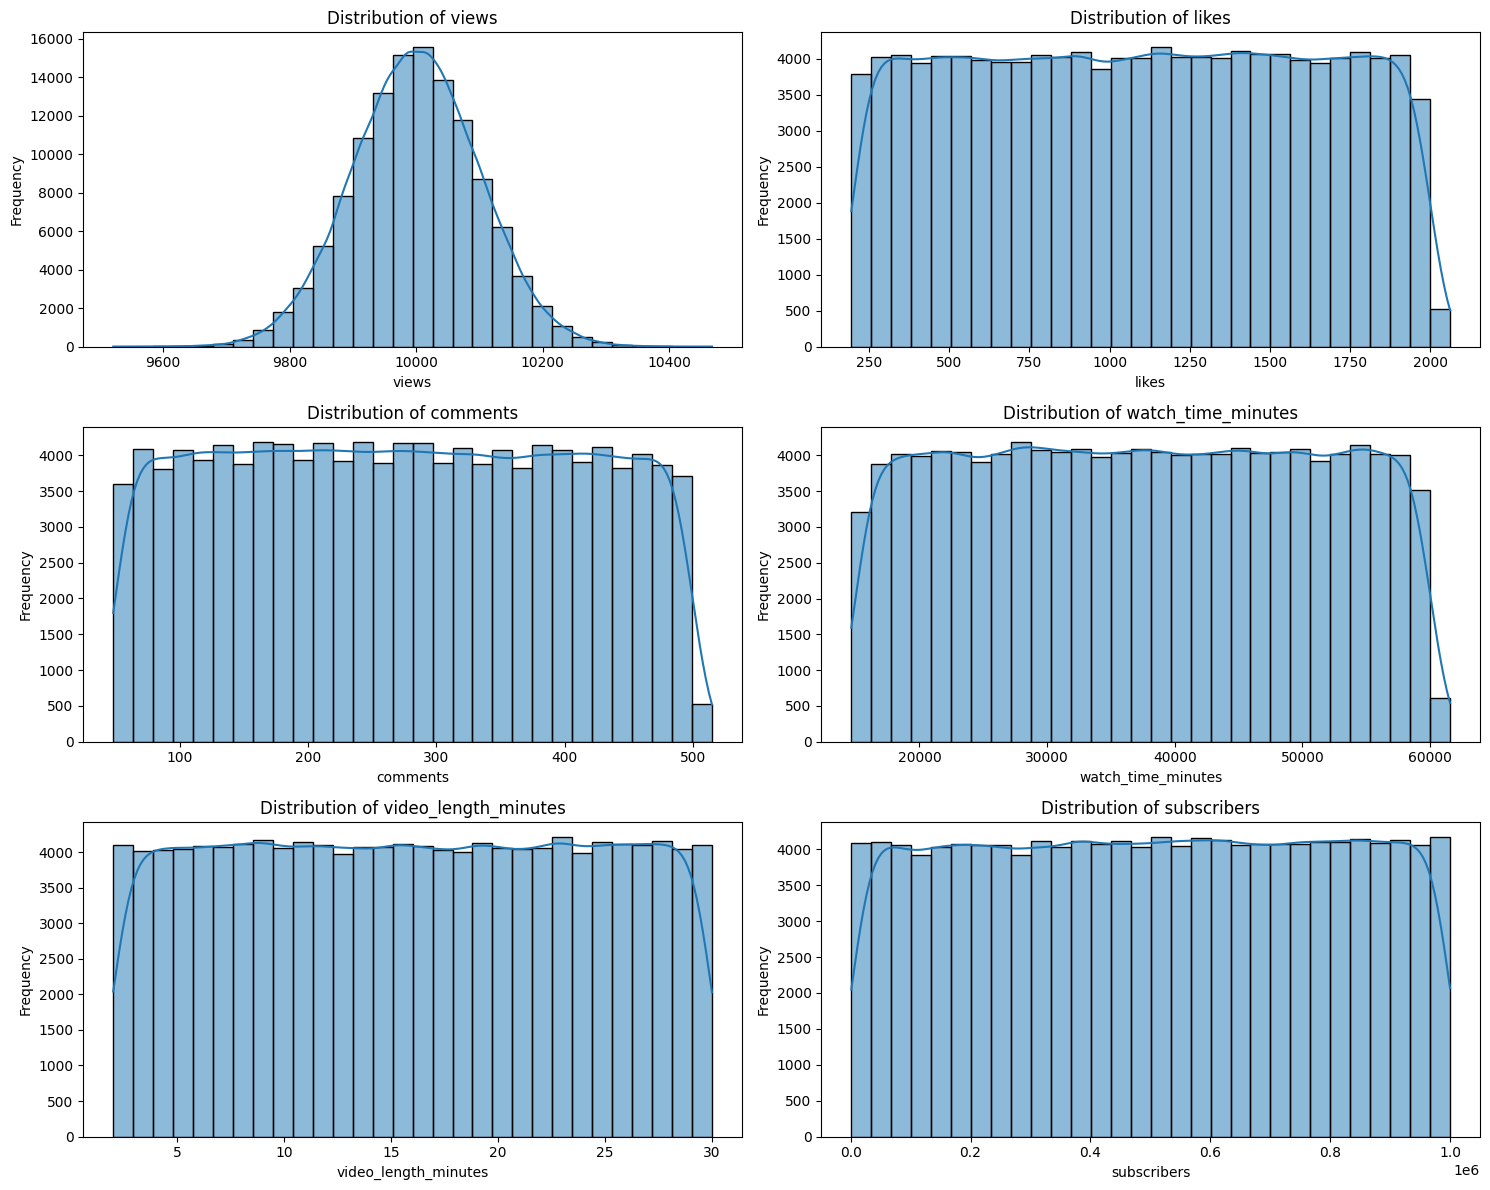

In [4]:
# ================================
# 📊 Step 5: Data Distributions (Numeric)
# ================================

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions for first 6 numeric columns (to avoid overcrowding)
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols[:6]):  # adjust number if you want more
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\luna love\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


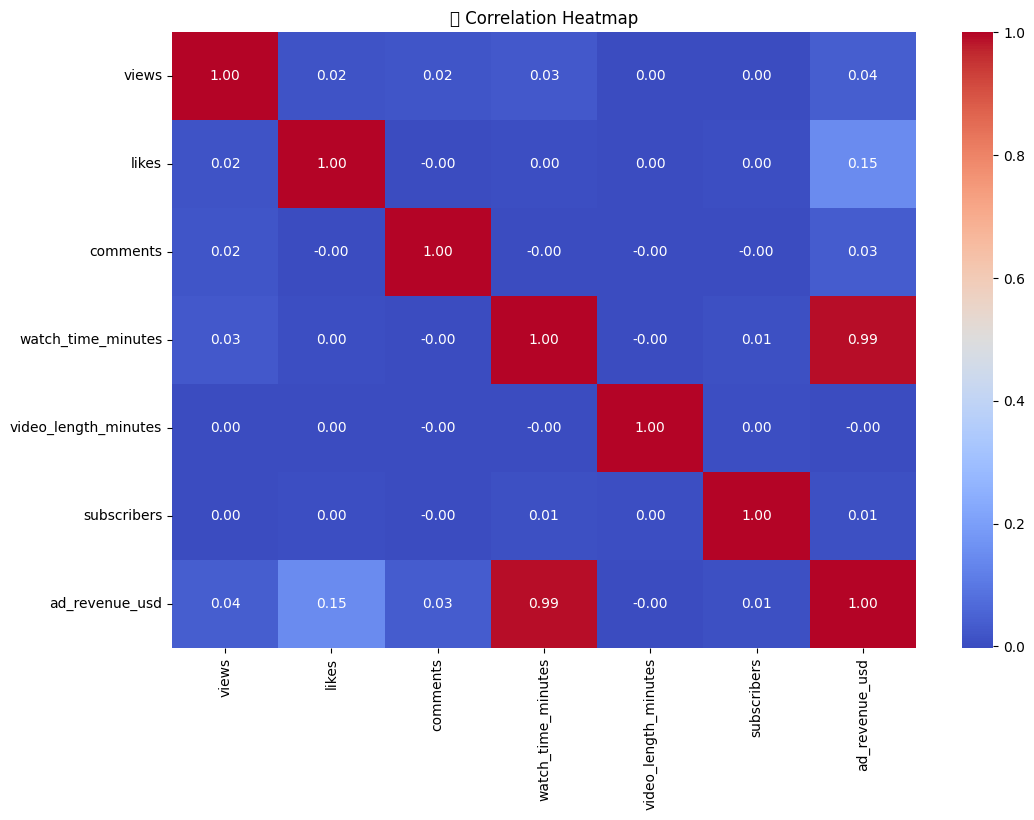

📌 Correlation with Target (ad_revenue_usd):
ad_revenue_usd          1.000000
watch_time_minutes      0.988874
likes                   0.146449
views                   0.038497
comments                0.034274
subscribers             0.005907
video_length_minutes   -0.000446
Name: ad_revenue_usd, dtype: float64


In [5]:
# ================================
# 🔗 Step 6: Correlation Heatmap
# ================================

plt.figure(figsize=(12, 8))

# Compute correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("🔗 Correlation Heatmap")
plt.show()

# Optional: Sort correlations with target variable
target_corr = corr["ad_revenue_usd"].sort_values(ascending=False)
print("📌 Correlation with Target (ad_revenue_usd):")
print(target_corr)


In [6]:
print("📝 Current columns in df:")
print(df.columns.tolist())


📝 Current columns in df:
['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category', 'device', 'country', 'ad_revenue_usd']


In [7]:
# ================================
# 📥 Step 1: Load Dataset
# ================================

import pandas as pd

# Load your CSV file (adjust path if needed)
df = pd.read_csv("../data/youtube_ad_revenue_dataset.csv")

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()


✅ Dataset loaded successfully!
Shape: (122400, 12)


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [8]:
# ================================
# 🧼 Step 2: Data Cleaning & Encoding
# ================================

# 1️⃣ Handle missing values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill numeric with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("✅ Missing values handled.")

# 2️⃣ Remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"🧹 Removed {before - after} duplicate rows.")

# 3️⃣ One-hot encode categorical columns
categorical_features = ['category', 'device', 'country']
df = pd.get_dummies(df, columns=categorical_features, drop_first=False)
print("🔸 One-hot encoding complete.")

# 4️⃣ Create engagement_rate feature
df['engagement_rate'] = (df['likes'] + df['comments']) / (df['views'] + 1)
print("✨ Feature 'engagement_rate' created.")

# 5️⃣ Drop unnecessary columns
df = df.drop(columns=['video_id', 'date'], errors='ignore')
print("🗑️ Dropped ID/date columns.")

print("✅ Final DataFrame shape:", df.shape)
df.head()


✅ Missing values handled.
🧹 Removed 2400 duplicate rows.
🔸 One-hot encoding complete.
✨ Feature 'engagement_rate' created.
🗑️ Dropped ID/date columns.
✅ Final DataFrame shape: (120000, 24)


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,category_Education,category_Entertainment,category_Gaming,...,device_Mobile,device_TV,device_Tablet,country_AU,country_CA,country_DE,country_IN,country_UK,country_US,engagement_rate
0,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,False,True,False,...,False,True,False,False,False,False,True,False,False,0.155077
1,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,False,False,True,...,False,False,True,False,True,False,False,False,False,0.098622
2,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,True,False,False,...,False,True,False,False,True,False,False,False,False,0.214498
3,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,False,True,False,...,True,False,False,False,False,False,False,True,False,0.142800
4,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,True,False,False,...,True,False,False,False,True,False,False,False,False,0.236097


In [9]:
# ================================
# 🧠 Step 3: Model Training & Evaluation (RandomForest)
# ================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Split data
target = 'ad_revenue_usd'
X = df.drop(columns=[target], errors='ignore')
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ Model Trained: RandomForestRegressor")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


✅ Model Trained: RandomForestRegressor
R² Score: 0.9498
RMSE: 13.87
MAE: 3.56


In [10]:
# ================================
# 💾 Step 4: Save Model
# ================================

import joblib

joblib.dump(model, "../app/best_model.pkl")
print("💾 Model saved to ../app/best_model.pkl")

# Optional: Check features for Streamlit
print("\n📌 Features used in model:")
print(model.feature_names_in_)


💾 Model saved to ../app/best_model.pkl

📌 Features used in model:
['views' 'likes' 'comments' 'watch_time_minutes' 'video_length_minutes'
 'subscribers' 'category_Education' 'category_Entertainment'
 'category_Gaming' 'category_Lifestyle' 'category_Music' 'category_Tech'
 'device_Desktop' 'device_Mobile' 'device_TV' 'device_Tablet' 'country_AU'
 'country_CA' 'country_DE' 'country_IN' 'country_UK' 'country_US'
 'engagement_rate']
